# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="





In [4]:
from pprint import pprint

pprint(query_url)

'http://api.openweathermap.org/data/2.5/weather?appid=62d6e69dcd15d3c6a21b9ec8bbe1b10b&units=imperial&q='


In [5]:
test_url = f"{url}appid={api_key}&units={units}&q=Nashville,US"

print(test_url)

http://api.openweathermap.org/data/2.5/weather?appid=62d6e69dcd15d3c6a21b9ec8bbe1b10b&units=imperial&q=Nashville,US


In [6]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Toronto,CA", "Moscow,RU", "Melbourne,AU", "Nashville,US"]

# set up lists to hold reponse info
lat = []
temp = []
humid = []
clouds = []
wind = []
name = []
city_info = []

# Loop through the list of cities and perform a request for data on each
for city_1 in cities:
    try:
        response = requests.get(query_url + city_1).json()
        print(f"City being processed: {response['name']}  id_num: {response['id']}")
        name = response['name']
        lat = response['coord']['lat']
        temp = response['main']['temp']
        humid = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
              
        city_info.append({"City":name,
                        "Lat": lat,
                        "Temp": temp,
                        "Humidity": humid,
                        "Clouds": clouds,
                        "Wind": wind
                         })     
    except:
        print("City not found.")
        pass
              
city_data = pd.DataFrame(city_info)
city_data.head(10)


City being processed: Susa  id_num: 3667665
City being processed: Punta Arenas  id_num: 3874787
City being processed: Dhidhdhoo  id_num: 1337612
City being processed: Makakilo City  id_num: 5850554
City being processed: Kapaa  id_num: 5848280
City being processed: Avarua  id_num: 4035715
City being processed: Mataura  id_num: 6201424
City being processed: Port Elizabeth  id_num: 4501427
City being processed: Auki  id_num: 2339937
City being processed: Ushuaia  id_num: 3833367
City being processed: Campbell River  id_num: 5914132
City being processed: Mar del Plata  id_num: 3863379
City being processed: Jamestown  id_num: 2069194
City being processed: Kralendijk  id_num: 3513563
City being processed: Rikitea  id_num: 4030556
City being processed: Barcelona  id_num: 3128760
City being processed: Naziya  id_num: 866055
City not found.
City being processed: Qaanaaq  id_num: 3831208
City being processed: Bethel  id_num: 5880568
City being processed: Pevek  id_num: 2122090
City being process

City being processed: Esperance  id_num: 2071860
City being processed: Balkanabat  id_num: 161616
City not found.
City being processed: Binzhou  id_num: 1816336
City being processed: Hermanus  id_num: 3366880
City being processed: Urambo  id_num: 149172
City being processed: Thompson  id_num: 6165406
City being processed: Airai  id_num: 1651810
City being processed: Rio Gallegos  id_num: 3838859
City being processed: Bredasdorp  id_num: 1015776
City being processed: Longyearbyen  id_num: 2729907
City being processed: Kibre Mengist  id_num: 333103
City being processed: Komsomolskiy  id_num: 1486910
City being processed: Ures  id_num: 3971596
City being processed: Aklavik  id_num: 5882953
City being processed: Tarangnan  id_num: 1682844
City being processed: Tiksi  id_num: 2015306
City being processed: Luangwa  id_num: 909887
City being processed: Isangel  id_num: 2136825
City being processed: Ranong  id_num: 1150965
City not found.
City being processed: Khandbari  id_num: 1283217
City b

City being processed: Valdivia  id_num: 3868707
City being processed: Cordoba  id_num: 3846616
City being processed: Ciudad Bolivar  id_num: 3645532
City being processed: Srednekolymsk  id_num: 2121025
City being processed: Ouro Preto do Oeste  id_num: 3924948
City being processed: Ojinaga  id_num: 3994469
City being processed: Khovu-Aksy  id_num: 1503527
City being processed: Palana  id_num: 2122262
City being processed: Uinskoye  id_num: 479442
City being processed: Maldonado  id_num: 3441894
City being processed: Zhanakorgan  id_num: 1517323
City being processed: Miranda  id_num: 3457113
City being processed: Nyrob  id_num: 516588
City not found.
City not found.
City not found.
City being processed: Erzin  id_num: 296852
City being processed: Chilliwack  id_num: 5921357
City being processed: Olinda  id_num: 2154386
City being processed: Saint-Paul  id_num: 3023532
City being processed: Lebu  id_num: 344979
City being processed: Bandarbeyla  id_num: 64814
City being processed: Baraco

City being processed: Taunggyi  id_num: 1293960
City not found.
City being processed: Sandwick  id_num: 2640416
City being processed: At-Bashi  id_num: 1528796
City being processed: Ruteng  id_num: 1629380
City being processed: Maraa  id_num: 3663475
City being processed: Ixtapa  id_num: 4004293
City being processed: Biu  id_num: 2346995
City being processed: Nuuk  id_num: 3421319
City being processed: Flinders  id_num: 6255012
City being processed: Najran  id_num: 103630
City being processed: Lensk  id_num: 2020838
City being processed: Xining  id_num: 1788852
City being processed: Pinawa  id_num: 6104820
City being processed: Great Falls  id_num: 5655240
City being processed: Astolfo Dutra  id_num: 3471369
City being processed: Penzance  id_num: 2640377
City being processed: Ahipara  id_num: 2194098
City being processed: Salinopolis  id_num: 3389822
City being processed: Eyl  id_num: 60019
City being processed: Douentza  id_num: 2458334
City being processed: Ena  id_num: 1855753
City

,City,Clouds,Humidity,Lat,Temp,Wind
0,Susa,97,90,5.45,65.55,1.63
1,Punta Arenas,90,93,-53.16,41.00,13.87
2,Dhidhdhoo,100,70,6.88,83.19,2.82
3,Makakilo City,75,83,21.35,82.00,10.29
4,Kapaa,40,74,22.08,82.15,10.29
5,Avarua,3,94,-21.21,69.80,2.24
6,Mataura,100,87,-46.19,44.01,5.01
7,Port Elizabeth,75,74,39.31,80.76,13.87
8,Auki,75,74,12.18,75.81,13.87
9,Ushuaia,75,93,-54.81,37.40,23.04


In [8]:
print(response)

{'coord': {'lon': 120.76, 'lat': 41.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 65.73, 'pressure': 1004.25, 'humidity': 64, 'temp_min': 65.73, 'temp_max': 65.73, 'sea_level': 1004.25, 'grnd_level': 944.3}, 'wind': {'speed': 4.18, 'deg': 325.121}, 'clouds': {'all': 49}, 'dt': 1562875853, 'sys': {'message': 0.0066, 'country': 'CN', 'sunrise': 1562877129, 'sunset': 1562931144}, 'timezone': 28800, 'id': 2038342, 'name': 'Beipiao', 'cod': 200}


In [9]:
city_data.count()

City        537
Clouds      537
Humidity    537
Lat         537
Temp        537
Wind        537
dtype: int64

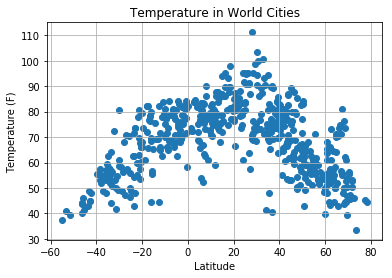

In [15]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/TemperatureInWorldCities.png")

# Show plot
plt.show()

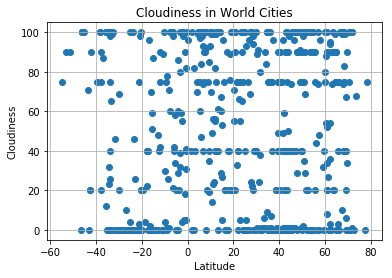

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Clouds"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/CloudinessInWorldCities.png")

# Show plot
plt.show()

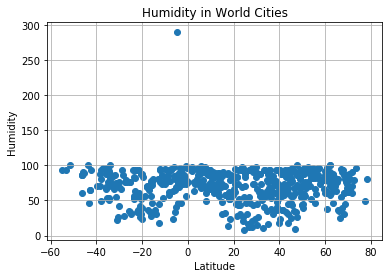

In [17]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/HumidityInWorldCities.png")

# Show plot
plt.show()

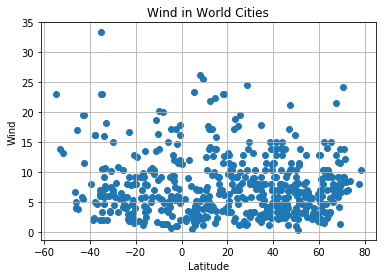

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_data["Lat"], city_data["Wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind in World Cities")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Images/WindInWorldCities.png")

# Show plot
plt.show()

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
city_data.to_csv('city_data.csv')

In [14]:
city_data

,City,Clouds,Humidity,Lat,Temp,Wind
0,Susa,97,90,5.45,65.55,1.63
1,Punta Arenas,90,93,-53.16,41.00,13.87
2,Dhidhdhoo,100,70,6.88,83.19,2.82
3,Makakilo City,75,83,21.35,82.00,10.29
4,Kapaa,40,74,22.08,82.15,10.29
5,Avarua,3,94,-21.21,69.80,2.24
6,Mataura,100,87,-46.19,44.01,5.01
7,Port Elizabeth,75,74,39.31,80.76,13.87
8,Auki,75,74,12.18,75.81,13.87
9,Ushuaia,75,93,-54.81,37.40,23.04


In [ ]:
OBSERVATIONS

1. The data has errors.  The humidity % for Talara is 290.  This cannot be more than 100%.
2. Temperatures further away from the equator tend to be lower than those closer to the equator.  This is what I would expect.
3. Cloudiness is not correlated to latitude.  I was surprised that there were many reportings of 100% clouds an 0% clouds.
4. Humidity levels also appear to be random.  i.e. there is no or minimal correlation between latitude and humidity.
5. Wind also appears to have no correlation with latitude.

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot